Please install GPU version of TF
Found 32680 images belonging to 10 classes.
Found 8164 images belonging to 10 classes.


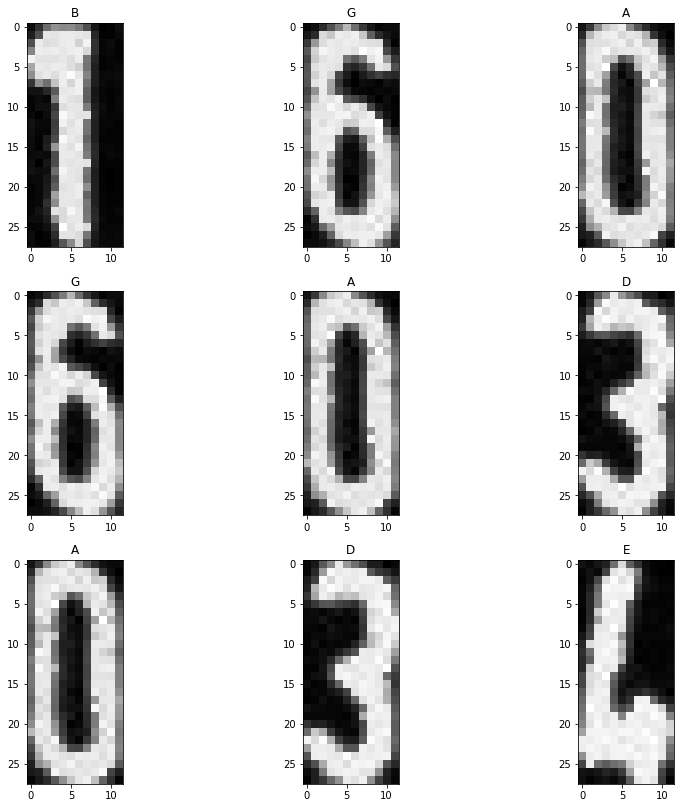

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z']

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

ds = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=32,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

validation_ds = ds.flow_from_directory(
    '../charLabel',
    target_size=(28,12),
    batch_size=32,
    subset='validation',
    color_mode='grayscale',
    class_mode='sparse'
)

input_shape = train_ds[0][0][0].shape

fig, axs = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (14,14)

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(validation_ds[0][0][i + j], cmap='gray')
        axs[i, j].set_title(class_names[int(validation_ds[0][1][i + j])])

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Conv2D(8, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu', 
                           kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                           padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 12, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 12, 8)         32        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 6, 8)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 6, 16)         1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 6, 16)         64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 3, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 3, 32)         

In [22]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') > 0.998 and logs.get('accuracy') > 0.999) :
            print('\nReached 99.9%\ acuracy so stopping training')
            self.model.stop_training = True

In [23]:
callback = stopCallback()

version = 9

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='D:\\Code\\AI\\Model\\CharacterRecognitionModel\\version9\\version9.hdf5',
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

history = model.fit(train_ds, 
                    epochs=125, 
                    callbacks=[model_checkpoint_callback], 
                    validation_data=validation_ds)

Epoch 1/125
 612/1022 [================>.............] - ETA: 6s - loss: 0.0054 - accuracy: 0.9997

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], color='orange', label='Train loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

(0.0, 6.0)

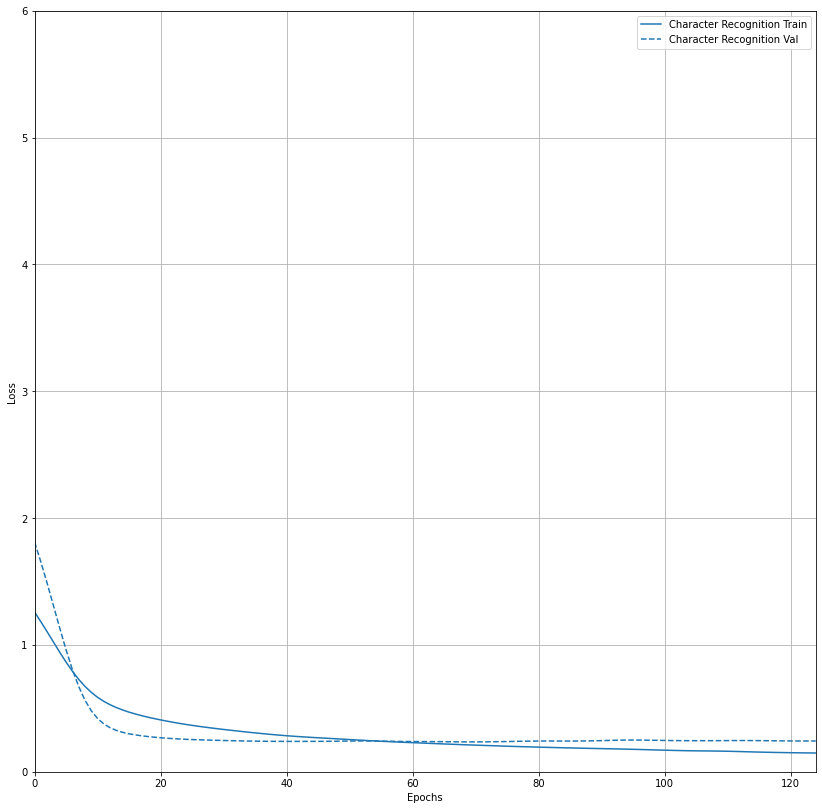

In [ ]:
plt.plot(history.history['accuracy'], color='orange', label='Train accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.legend()
plt.show()